<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/lipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

import sklearn 
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import random as rd
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sklearn
from pandas import read_csv
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFdr
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# path = r"C:\\Users\\ahmad\\Desktop\\bace_global_cdf_rdkit.csv"
# fileX=open(path)
# dataXX=csv.reader(fileX)
# headerX=next(dataXX)
# print(os.uname())


In [6]:

from google.colab import files
uploaded = files.upload()


Saving lipo(Lables).csv to lipo(Lables).csv


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving lipo(Lables).csv to lipo(Lables) (2).csv


In [10]:
from google.colab import files
uploaded = files.upload()


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit.csv


In [8]:
import io
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(dataY[dataY.isnull().any(axis=1)])
print(dataY.shape)
dataY = dataY.drop(1561)
print(dataY.shape)

Empty DataFrame
Columns: [smiles, lipo]
Index: []
(4200, 2)
(4199, 2)


[-1.18 3.69 3.37 ... 2.1 2.65 2.7]
      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17 

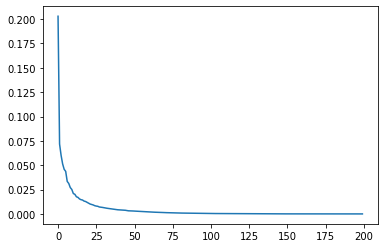

In [11]:
from sklearn.decomposition import PCA
import io
data = pd.read_csv(io.BytesIO(uploaded['lipo_global_cdf_rdkit.csv']))

arrayY = dataY.values
Y = arrayY[1: , 1 ]
print(Y)
print(data[data.isnull().any(axis=1)])
print(len(data))
data = data.dropna()
print(len(data))
array = data.values
X = array[1:,1:]
print(X)
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
print(data.shape)
print(len(X_test))
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()

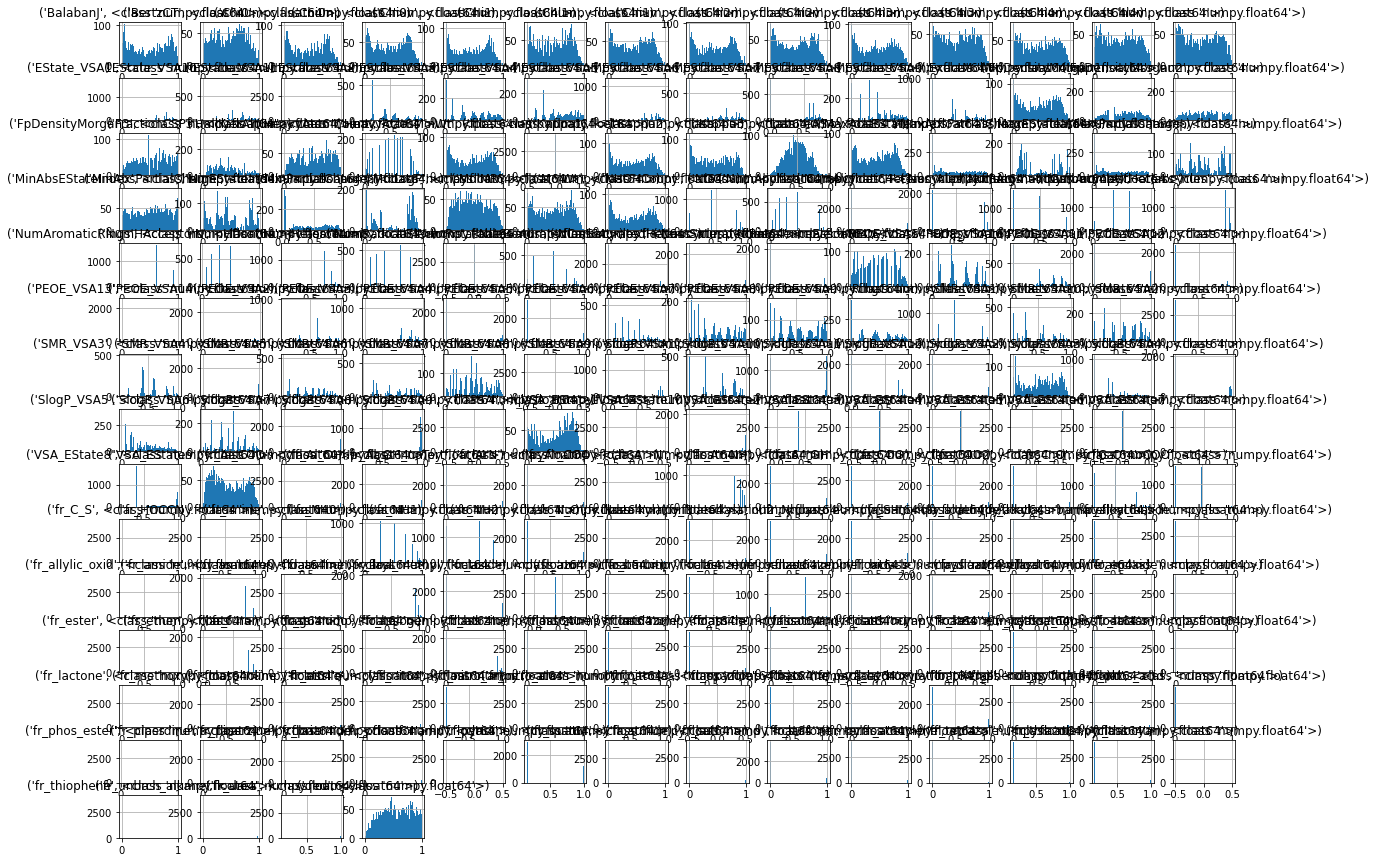

In [12]:
data.hist(bins=100, figsize=(20,15))

plt.show()

In [14]:
import pandas as pd
pca = PCA(n_components=60)
pca.fit(X_train)
X_train=pca.transform(X_train)


print(X_test.shape)

print(X_train.shape)
X_test = pca.transform(X_test)
print(X_test.shape)
print(Y_train.shape)
print(Y_train)
print("Ytype = " +str( type(Y_train)))
print("Xtype="+str(type(X_train)))

(840, 60)
(3358, 60)
(840, 60)
(3358,)
[4.3 2.6 1.7 ... 0.9 2.94 3.0]
Ytype = <class 'numpy.ndarray'>
Xtype=<class 'numpy.ndarray'>


In [22]:
#Y_w = Y_train.reshape(-1,1)
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [27]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [28]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [29]:
def load_data(data_dir=None):
    return trainset, testset

In [30]:
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1",100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2",100))

        self.linear1 = nn.Linear(12, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.linear2(out)
        out = self.linear3(out)
        return out

In [31]:
model = Net({})

In [32]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [39]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

RuntimeError: ignored

In [40]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [41]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [42]:
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'object_store_memory': 3935655936.0, 'memory': 7871311872.0, 'CPU': 2.0, 'node:172.28.0.2': 1.0}


''

In [43]:
%%capture
try:
    import optuna
except:
    %pip install optuna
    import optuna

In [46]:
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([8, 16, 32]),
        "hidden_dim1" : tune.quniform(50, 200, 10),
        "hidden_dim2" : tune.quniform(50, 200, 10),
        "hidden_dim3" : tune.quniform(50, 200, 10),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)

    scheduler = ASHAScheduler(
        metric ="loss",
        mode="min",
        max_t=max_num_epochs,
        reduction_factor=2, 
        grace_period=4,
        brackets=5
        )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-16 11:47:11,576	INFO logger.py:630 -- pip install "ray[tune]" to see TensorBoard files.
2022-07-16 11:47:11,579	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-16 11:47:12 (running for 00:00:00.46)
Memory usage on this node: 2.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 1/50 (1 RUNNING)
+-------------------------+----------+----------------+---------+--------+--------+--------------+---------------+---------------+---------------+-------+
| Trial name              | status   | loc            | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |    lr |
|-------------------------+----------+----------------+---------+--------+--------+--------------+---------------+------

(func pid=955) 2022-07-16 11:47:17,536	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=955) Traceback (most recent call last):
(func pid=955)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=955)     self._entrypoint()
(func pid=955)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=955)     self._status_reporter.get_checkpoint(),
(func pid=955)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=955)     return method(self, *_args, **_kwargs)
(func pid=955)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=955)     output = fn()
(func pid=955)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=955)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 1130, in _ca

== Status ==
Current time: 2022-07-16 11:47:17 (running for 00:00:05.88)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 1.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 2/50 (2 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+-

(func pid=1000) 2022-07-16 11:47:25,704	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1000) Traceback (most recent call last):
(func pid=1000)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1000)     self._entrypoint()
(func pid=1000)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1000)     self._status_reporter.get_checkpoint(),
(func pid=1000)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1000)     return method(self, *_args, **_kwargs)
(func pid=1000)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1000)     output = fn()
(func pid=1000)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1000)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_0ad9d7bc errored with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'selu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 130.0, 'hidden_dim2': 70.0, 'hidden_dim3': 100.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_0ad9d7bc_2_act1=selu,act2=relu,act3=selu,batch_size=32,hidden_dim1=130.0000,hidden_dim2=70.0000,hidden_dim3=100.000_2022-07-16_11-47-17/error.txt


(func pid=1078) 2022-07-16 11:47:38,468	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1078) Traceback (most recent call last):
(func pid=1078)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1078)     self._entrypoint()
(func pid=1078)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1078)     self._status_reporter.get_checkpoint(),
(func pid=1078)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1078)     return method(self, *_args, **_kwargs)
(func pid=1078)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1078)     output = fn()
(func pid=1078)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1078)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:47:32 (running for 00:00:21.20)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 7/50 (2 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+------------

(func pid=1143) 2022-07-16 11:47:42,966	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1143) Traceback (most recent call last):
(func pid=1143)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1143)     self._entrypoint()
(func pid=1143)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1143)     self._status_reporter.get_checkpoint(),
(func pid=1143)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1143)     return method(self, *_args, **_kwargs)
(func pid=1143)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1143)     output = fn()
(func pid=1143)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1143)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_10f5d8f8 errored with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'relu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 110.0, 'hidden_dim2': 180.0, 'hidden_dim3': 200.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_10f5d8f8_6_act1=tanh,act2=tanh,act3=relu,batch_size=16,hidden_dim1=110.0000,hidden_dim2=180.0000,hidden_dim3=200.00_2022-07-16_11-47-27/error.txt


(func pid=1296) 2022-07-16 11:47:56,039	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1296) Traceback (most recent call last):
(func pid=1296)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1296)     self._entrypoint()
(func pid=1296)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1296)     self._status_reporter.get_checkpoint(),
(func pid=1296)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1296)     return method(self, *_args, **_kwargs)
(func pid=1296)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1296)     output = fn()
(func pid=1296)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1296)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:47:50 (running for 00:00:39.32)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 11/50 (6 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+-----------

2022-07-16 11:47:58,436	ERROR trial_runner.py:886 -- Trial trainable_func_1bbef364: Error processing event.
NoneType: None
(func pid=1361) 2022-07-16 11:47:58,391	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1361) Traceback (most recent call last):
(func pid=1361)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1361)     self._entrypoint()
(func pid=1361)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1361)     self._status_reporter.get_checkpoint(),
(func pid=1361)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1361)     return method(self, *_args, **_kwargs)
(func pid=1361)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1361)     output = fn()
(func pid=1361)   File "<ipython-input-40-66e501af8eec>", l

The trial trainable_func_1bbef364 errored with parameters={'act1 ': 'selu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 8, 'hidden_dim1': 140.0, 'hidden_dim2': 110.0, 'hidden_dim3': 130.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_1bbef364_10_act1=selu,act2=selu,act3=relu,batch_size=8,hidden_dim1=140.0000,hidden_dim2=110.0000,hidden_dim3=130.00_2022-07-16_11-47-45/error.txt


(func pid=1512) 2022-07-16 11:48:10,959	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1512) Traceback (most recent call last):
(func pid=1512)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1512)     self._entrypoint()
(func pid=1512)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1512)     self._status_reporter.get_checkpoint(),
(func pid=1512)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1512)     return method(self, *_args, **_kwargs)
(func pid=1512)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1512)     output = fn()
(func pid=1512)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1512)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:48:04 (running for 00:00:53.34)
Memory usage on this node: 3.9/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 15/50 (10 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=1574) 2022-07-16 11:48:15,832	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1574) Traceback (most recent call last):
(func pid=1574)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1574)     self._entrypoint()
(func pid=1574)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1574)     self._status_reporter.get_checkpoint(),
(func pid=1574)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1574)     return method(self, *_args, **_kwargs)
(func pid=1574)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1574)     output = fn()
(func pid=1574)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1574)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_2421e908 errored with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 60.0, 'hidden_dim2': 130.0, 'hidden_dim3': 90.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_2421e908_14_act1=selu,act2=relu,act3=tanh,batch_size=16,hidden_dim1=60.0000,hidden_dim2=130.0000,hidden_dim3=90.000_2022-07-16_11-47-59/error.txt
The trial trainable_func_2412fd80 errored with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0009, 'batch_size': 32, 'hidden_dim1': 50.0, 'hidden_dim2': 50.0, 'hidden_dim3': 80.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_2412fd80_13_act1=tanh,act2=selu,act3=relu,batch_size=32,hidden_dim1=50.0000,hidden_dim2=50.0000,hidden_dim3=80.0000_2022-07-16_11-47-59/error.txt


(func pid=1727) 2022-07-16 11:48:26,406	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1727) Traceback (most recent call last):
(func pid=1727)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1727)     self._entrypoint()
(func pid=1727)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1727)     self._status_reporter.get_checkpoint(),
(func pid=1727)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1727)     return method(self, *_args, **_kwargs)
(func pid=1727)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1727)     output = fn()
(func pid=1727)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1727)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:48:23 (running for 00:01:11.58)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 19/50 (14 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

2022-07-16 11:48:29,260	ERROR trial_runner.py:886 -- Trial trainable_func_2eec3be0: Error processing event.
NoneType: None


The trial trainable_func_2eec3be0 errored with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 90.0, 'hidden_dim2': 140.0, 'hidden_dim3': 140.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_2eec3be0_17_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=90.0000,hidden_dim2=140.0000,hidden_dim3=140.00_2022-07-16_11-48-17/error.txt


(func pid=1945) 2022-07-16 11:48:40,275	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=1945) Traceback (most recent call last):
(func pid=1945)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=1945)     self._entrypoint()
(func pid=1945)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=1945)     self._status_reporter.get_checkpoint(),
(func pid=1945)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=1945)     return method(self, *_args, **_kwargs)
(func pid=1945)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=1945)     output = fn()
(func pid=1945)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=1945)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:48:35 (running for 00:01:24.24)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 23/50 (18 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

2022-07-16 11:48:42,960	ERROR trial_runner.py:886 -- Trial trainable_func_367c19a2: Error processing event.
NoneType: None
(func pid=2007) 2022-07-16 11:48:42,897	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2007) Traceback (most recent call last):
(func pid=2007)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2007)     self._entrypoint()
(func pid=2007)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2007)     self._status_reporter.get_checkpoint(),
(func pid=2007)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2007)     return method(self, *_args, **_kwargs)
(func pid=2007)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2007)     output = fn()
(func pid=2007)   File "<ipython-input-40-66e501af8eec>", l

The trial trainable_func_367c19a2 errored with parameters={'act1 ': 'tanh', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0006000000000000001, 'batch_size': 32, 'hidden_dim1': 180.0, 'hidden_dim2': 50.0, 'hidden_dim3': 100.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_367c19a2_21_act1=tanh,act2=tanh,act3=tanh,batch_size=32,hidden_dim1=180.0000,hidden_dim2=50.0000,hidden_dim3=100.00_2022-07-16_11-48-30/error.txt


(func pid=2159) 2022-07-16 11:48:54,522	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2159) Traceback (most recent call last):
(func pid=2159)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2159)     self._entrypoint()
(func pid=2159)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2159)     self._status_reporter.get_checkpoint(),
(func pid=2159)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2159)     return method(self, *_args, **_kwargs)
(func pid=2159)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2159)     output = fn()
(func pid=2159)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2159)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:48:49 (running for 00:01:38.33)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 27/50 (22 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=2223) 2022-07-16 11:48:58,247	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2223) Traceback (most recent call last):
(func pid=2223)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2223)     self._entrypoint()
(func pid=2223)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2223)     self._status_reporter.get_checkpoint(),
(func pid=2223)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2223)     return method(self, *_args, **_kwargs)
(func pid=2223)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2223)     output = fn()
(func pid=2223)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2223)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_3ee80858 errored with parameters={'act1 ': 'tanh', 'act2': 'selu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 32, 'hidden_dim1': 160.0, 'hidden_dim2': 160.0, 'hidden_dim3': 80.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_3ee80858_25_act1=tanh,act2=selu,act3=tanh,batch_size=32,hidden_dim1=160.0000,hidden_dim2=160.0000,hidden_dim3=80.00_2022-07-16_11-48-44/error.txt


(func pid=2374) 2022-07-16 11:49:08,029	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2374) Traceback (most recent call last):
(func pid=2374)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2374)     self._entrypoint()
(func pid=2374)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2374)     self._status_reporter.get_checkpoint(),
(func pid=2374)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2374)     return method(self, *_args, **_kwargs)
(func pid=2374)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2374)     output = fn()
(func pid=2374)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2374)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:49:04 (running for 00:01:53.36)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 31/50 (26 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=2428) 2022-07-16 11:49:11,829	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2428) Traceback (most recent call last):
(func pid=2428)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2428)     self._entrypoint()
(func pid=2428)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2428)     self._status_reporter.get_checkpoint(),
(func pid=2428)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2428)     return method(self, *_args, **_kwargs)
(func pid=2428)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2428)     output = fn()
(func pid=2428)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2428)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_47da9d4a errored with parameters={'act1 ': 'relu', 'act2': 'tanh', 'act3': 'selu', 'lr': 0.0005, 'batch_size': 16, 'hidden_dim1': 180.0, 'hidden_dim2': 190.0, 'hidden_dim3': 80.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_47da9d4a_29_act1=relu,act2=tanh,act3=selu,batch_size=16,hidden_dim1=180.0000,hidden_dim2=190.0000,hidden_dim3=80.00_2022-07-16_11-48-59/error.txt


(func pid=2589) 2022-07-16 11:49:21,738	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2589) Traceback (most recent call last):
(func pid=2589)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2589)     self._entrypoint()
(func pid=2589)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2589)     self._status_reporter.get_checkpoint(),
(func pid=2589)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2589)     return method(self, *_args, **_kwargs)
(func pid=2589)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2589)     output = fn()
(func pid=2589)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2589)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:49:18 (running for 00:02:07.34)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 35/50 (30 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=2627) 2022-07-16 11:49:24,375	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2627) Traceback (most recent call last):
(func pid=2627)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2627)     self._entrypoint()
(func pid=2627)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2627)     self._status_reporter.get_checkpoint(),
(func pid=2627)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2627)     return method(self, *_args, **_kwargs)
(func pid=2627)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2627)     output = fn()
(func pid=2627)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2627)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_503d44ec errored with parameters={'act1 ': 'tanh', 'act2': 'relu', 'act3': 'relu', 'lr': 0.001, 'batch_size': 32, 'hidden_dim1': 80.0, 'hidden_dim2': 180.0, 'hidden_dim3': 100.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_503d44ec_34_act1=tanh,act2=relu,act3=relu,batch_size=32,hidden_dim1=80.0000,hidden_dim2=180.0000,hidden_dim3=100.00_2022-07-16_11-49-13/error.txt


(func pid=2805) 2022-07-16 11:49:34,053	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2805) Traceback (most recent call last):
(func pid=2805)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2805)     self._entrypoint()
(func pid=2805)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2805)     self._status_reporter.get_checkpoint(),
(func pid=2805)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2805)     return method(self, *_args, **_kwargs)
(func pid=2805)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2805)     output = fn()
(func pid=2805)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2805)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:49:31 (running for 00:02:19.42)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 39/50 (34 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=2867) 2022-07-16 11:49:36,425	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=2867) Traceback (most recent call last):
(func pid=2867)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=2867)     self._entrypoint()
(func pid=2867)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=2867)     self._status_reporter.get_checkpoint(),
(func pid=2867)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=2867)     return method(self, *_args, **_kwargs)
(func pid=2867)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=2867)     output = fn()
(func pid=2867)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=2867)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_576e478e errored with parameters={'act1 ': 'relu', 'act2': 'relu', 'act3': 'relu', 'lr': 0.0008, 'batch_size': 16, 'hidden_dim1': 70.0, 'hidden_dim2': 110.0, 'hidden_dim3': 130.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_576e478e_38_act1=relu,act2=relu,act3=relu,batch_size=16,hidden_dim1=70.0000,hidden_dim2=110.0000,hidden_dim3=130.00_2022-07-16_11-49-25/error.txt


(func pid=3017) 2022-07-16 11:49:45,969	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=3017) Traceback (most recent call last):
(func pid=3017)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=3017)     self._entrypoint()
(func pid=3017)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=3017)     self._status_reporter.get_checkpoint(),
(func pid=3017)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=3017)     return method(self, *_args, **_kwargs)
(func pid=3017)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=3017)     output = fn()
(func pid=3017)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=3017)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:49:42 (running for 00:02:31.32)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 43/50 (38 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=3070) 2022-07-16 11:49:48,388	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=3070) Traceback (most recent call last):
(func pid=3070)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=3070)     self._entrypoint()
(func pid=3070)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=3070)     self._status_reporter.get_checkpoint(),
(func pid=3070)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=3070)     return method(self, *_args, **_kwargs)
(func pid=3070)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=3070)     output = fn()
(func pid=3070)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=3070)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_5e8d19aa errored with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 50.0, 'hidden_dim2': 150.0, 'hidden_dim3': 50.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_5e8d19aa_42_act1=selu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=50.0000,hidden_dim2=150.0000,hidden_dim3=50.0000_2022-07-16_11-49-37/error.txt
The trial trainable_func_5e82dbfc errored with parameters={'act1 ': 'selu', 'act2': 'tanh', 'act3': 'tanh', 'lr': 0.0005, 'batch_size': 8, 'hidden_dim1': 110.0, 'hidden_dim2': 60.0, 'hidden_dim3': 80.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_5e82dbfc_41_act1=selu,act2=tanh,act3=tanh,batch_size=8,hidden_dim1=110.0000,hidden_dim2=60.0000,hidden_dim3=80.0000_2022-07-16_11-49-37/error.txt


(func pid=3230) 2022-07-16 11:49:57,921	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=3230) Traceback (most recent call last):
(func pid=3230)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=3230)     self._entrypoint()
(func pid=3230)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=3230)     self._status_reporter.get_checkpoint(),
(func pid=3230)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=3230)     return method(self, *_args, **_kwargs)
(func pid=3230)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=3230)     output = fn()
(func pid=3230)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=3230)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:49:54 (running for 00:02:43.32)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 47/50 (42 ERROR, 1 PENDING, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+----------

(func pid=3285) 2022-07-16 11:50:00,376	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=3285) Traceback (most recent call last):
(func pid=3285)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=3285)     self._entrypoint()
(func pid=3285)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=3285)     self._status_reporter.get_checkpoint(),
(func pid=3285)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=3285)     return method(self, *_args, **_kwargs)
(func pid=3285)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=3285)     output = fn()
(func pid=3285)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=3285)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

The trial trainable_func_65a8e9d0 errored with parameters={'act1 ': 'relu', 'act2': 'selu', 'act3': 'relu', 'lr': 0.0007, 'batch_size': 8, 'hidden_dim1': 160.0, 'hidden_dim2': 150.0, 'hidden_dim3': 90.0}. Error file: /root/ray_results/trainable_func_2022-07-16_11-47-11/trainable_func_65a8e9d0_45_act1=relu,act2=selu,act3=relu,batch_size=8,hidden_dim1=160.0000,hidden_dim2=150.0000,hidden_dim3=90.000_2022-07-16_11-49-49/error.txt


(func pid=3445) 2022-07-16 11:50:10,039	ERROR function_runner.py:286 -- Runner Thread raised error.
(func pid=3445) Traceback (most recent call last):
(func pid=3445)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 277, in run
(func pid=3445)     self._entrypoint()
(func pid=3445)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 352, in entrypoint
(func pid=3445)     self._status_reporter.get_checkpoint(),
(func pid=3445)   File "/usr/local/lib/python3.7/dist-packages/ray/util/tracing/tracing_helper.py", line 462, in _resume_span
(func pid=3445)     return method(self, *_args, **_kwargs)
(func pid=3445)   File "/usr/local/lib/python3.7/dist-packages/ray/tune/function_runner.py", line 645, in _trainable_func
(func pid=3445)     output = fn()
(func pid=3445)   File "<ipython-input-40-66e501af8eec>", line 62, in trainable_func
(func pid=3445)   File "/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py", line 

== Status ==
Current time: 2022-07-16 11:50:06 (running for 00:02:55.35)
Memory usage on this node: 2.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0.0/7.33 GiB heap, 0.0/3.67 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-16_11-47-11
Number of trials: 50/50 (46 ERROR, 4 RUNNING)
+-------------------------+----------+-----------------+---------+--------+--------+--------------+---------------+---------------+---------------+--------+
| Trial name              | status   | loc             | act1    | act2   | act3   |   batch_size |   hidden_dim1 |   hidden_dim2 |   hidden_dim3 |     lr |
|-------------------------+----------+-----------------+---------+--------+--------+--------------+------

TuneError: ignored

In [47]:
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch  
from ray.tune.suggest.dragonfly import DragonflySearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.schedulers.hb_bohb import HyperBandForBOHB
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.schedulers import MedianStoppingRule
from ray.tune.schedulers import PopulationBasedTraining
from ray.tune.suggest.bohb import TuneBOHB
from ray.tune.suggest.basic_variant import BasicVariantGenerator
from ray.tune.suggest import ConcurrencyLimiter

In [48]:
training_iteration = 50 #max_num_epochs

## ASHA
scheduler = AsyncHyperBandScheduler(
    time_attr="training_iteration",
    max_t=training_iteration,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    reduction_factor=2, 
    grace_period=4,
    brackets=5,
    )

## BOHB
scheduler = HyperBandForBOHB(
    time_attr="training_iteration",
    max_t=training_iteration, 
    reduction_factor=8, 
    stop_last_trials=True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )

## Median
scheduler = MedianStoppingRule(
    time_attr="training_iteration",
    grace_period=10,
    min_samples_required=10,
    hard_stop = True,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    )

## PBT
scheduler = PopulationBasedTraining(
    time_attr="training_iteration",
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    perturbation_interval=10,  # every 10 `time_attr` units
                            # (training_iterations in this case)
    # hyperparam_mutations={
    #     "lr": [8e-3, 7e-3, 6e-3, 5e-3, 4e-3],
    #     "dropout": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout1": tune.quniform(0.0, 0.4, 0.05),
    #     "dropout2": tune.quniform(0.0, 0.4, 0.05),
    #     "max_norm_val":tune.choice([2.5, 3, 3.5, 4]),
    #     }
    )


In [52]:
!pip install hpbandster ConfigSpace
!pip install dragonfly-opt
search_alg = TuneBOHB(
    # space=config_space,  # If you want to set the space manually
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    # seed = 42,
    # points_to_evaluate=[
    # ],
    )

## Hyperopt
search_alg = HyperOptSearch(
    # space=config,
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    n_initial_points=60,
    # gamma = 0.1,
    # random_state_seed=42,
    # points_to_evaluate=[{"max_norm_val": 2.5, 'GNN_Layers': 3, 'dropout': 0.25, 'dropout1': 0.35, 'dropout2': 0.15, 'lr': 0.001, 'hidden_size': 80, 'readout1_out': 150, 'readout2_out': 100, 'batch_size': 64}],
    )

## Optuna
search_alg = OptunaSearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    # seed = 42,
    # points_to_evaluate=[
    # {'dropout': 0.2, 'dropout1': 0.1, 'dropout2': 0.25, 'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0, 'max_norm_val': 2.5}
    # ],
    )

## Dragonfly
search_alg = DragonflySearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    optimizer="bandit", #[random, bandit, genetic]
    # points_to_evaluate=[
    # {'max_norm_val': 2.5, 'dropout': 0.3, 'dropout1': 0.1, 'dropout2': 0.0, 'lr': 0.0008, 'hidden_size': 90, 'readout1_out': 150, 'readout2_out': 140}
    # ],
    # domain=euclidean, #[cartesian, euclidean]
    )

## Bayesopt
search_alg = BayesOptSearch(
    metric="loss", #or accuracy, etc.
    mode="min", #or max
    random_search_steps = 60, 
    # points_to_evaluate=[
    # {'max_norm_val': 2.5, 'dropout': 0.3, 'dropout1': 0.1, 'dropout2': 0.0, 'lr': 0.0008, 'hidden_size': 90, 'readout1_out': 150, 'readout2_out': 140}
    # ],
    )

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 23.4 MB/s 
  Created wheel for dragonfly-opt: filename=dragonfly_opt-0.1.6-cp37-cp37m-linux_x86_64.whl size=411413 sha256=0648143079583a689a98819b82cc6ac1e7d1039338d43da92bad54b70d246e9a
  Stored in directory: /root/.cache/pip/wheels/bb/79/94/461f622bdd697be30dfe11c2590b574deee78320aa6f5cc2ba
Successfully built dragonfly-opt


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 49))



AssertionError: ignored